In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
import cv2
import os
from PIL import Image

In [7]:
df_train = pd.read_csv('../datasets/training/metadata.csv')
df_test = pd.read_csv('../datasets/test/metadata.csv')
df_eval = pd.read_csv('../datasets/evaluation/metadata.csv')

df_train['type'] = 'train'
df_test['type'] = 'test'
df_eval['type'] = 'eval'

df = pd.concat([df_train, df_test, df_eval])


In [8]:
df_train.head(10)


,file_name,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,type
0,1.png,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
1,2.png,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
2,3.png,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
3,4.png,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
4,5.png,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
5,6.png,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,train
6,7.png,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,train
7,8.png,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,train
8,9.png,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,train
9,10.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train


In [9]:
# For each desease, plot the images with only this desease
def show_images(file_names):
    plt.figure(figsize=(16, 12))

    for plot_index, file_name in enumerate(file_names):
        plt.subplot(4, 4, plot_index + 1)
        image = mpimg.imread(os.path.join('../datasets/training/', file_name))
        plt.imshow(image)
        title = ""
        for desease in df_train.columns[2:]:
            if df_train[df_train['file_name'] == file_name][desease].values[0] == 1:
                title += desease + " "
        plt.title(title)
        plt.axis('off')

    plt.show()

desease_list = ['DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO',
       'TSLN', 'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP',
       'ODE', 'ST', 'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL',
       'RP', 'CWS', 'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME',
       'PTCR', 'CF', 'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL']


In [10]:
# for desease in desease_list:
#     file_names = df_train[df_train[desease] == 1]['file_name'].values[:4]
#     show_images(file_names)


Text(0, 0.5, 'Number of images')

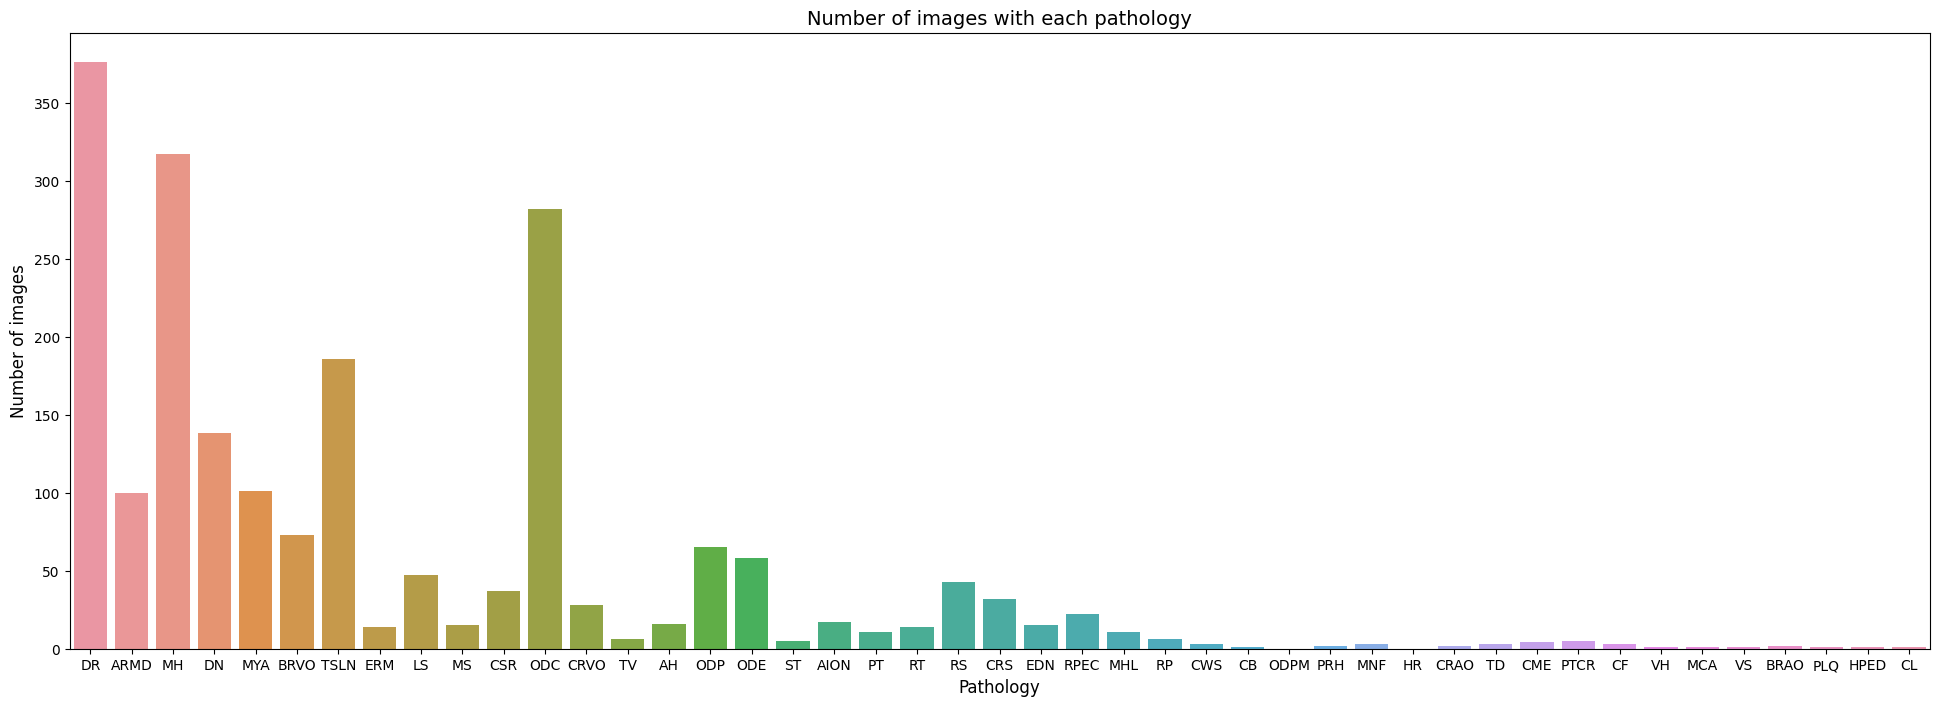

In [11]:
# Histogram of the number of images with each pathology for all the dataset (train, test and validation)
plt.figure(figsize=(24, 8))

values = df_train.drop(['file_name', 'Disease_Risk', 'type'], axis=1)
x = values.columns
y = values.sum().values

sns.barplot(y=y,x=x)
plt.title("Number of images with each pathology", fontsize=14)
plt.xlabel("Pathology", fontsize=12)
plt.ylabel("Number of images", fontsize=12)


<Axes: xlabel='Disease_Risk', ylabel='count'>

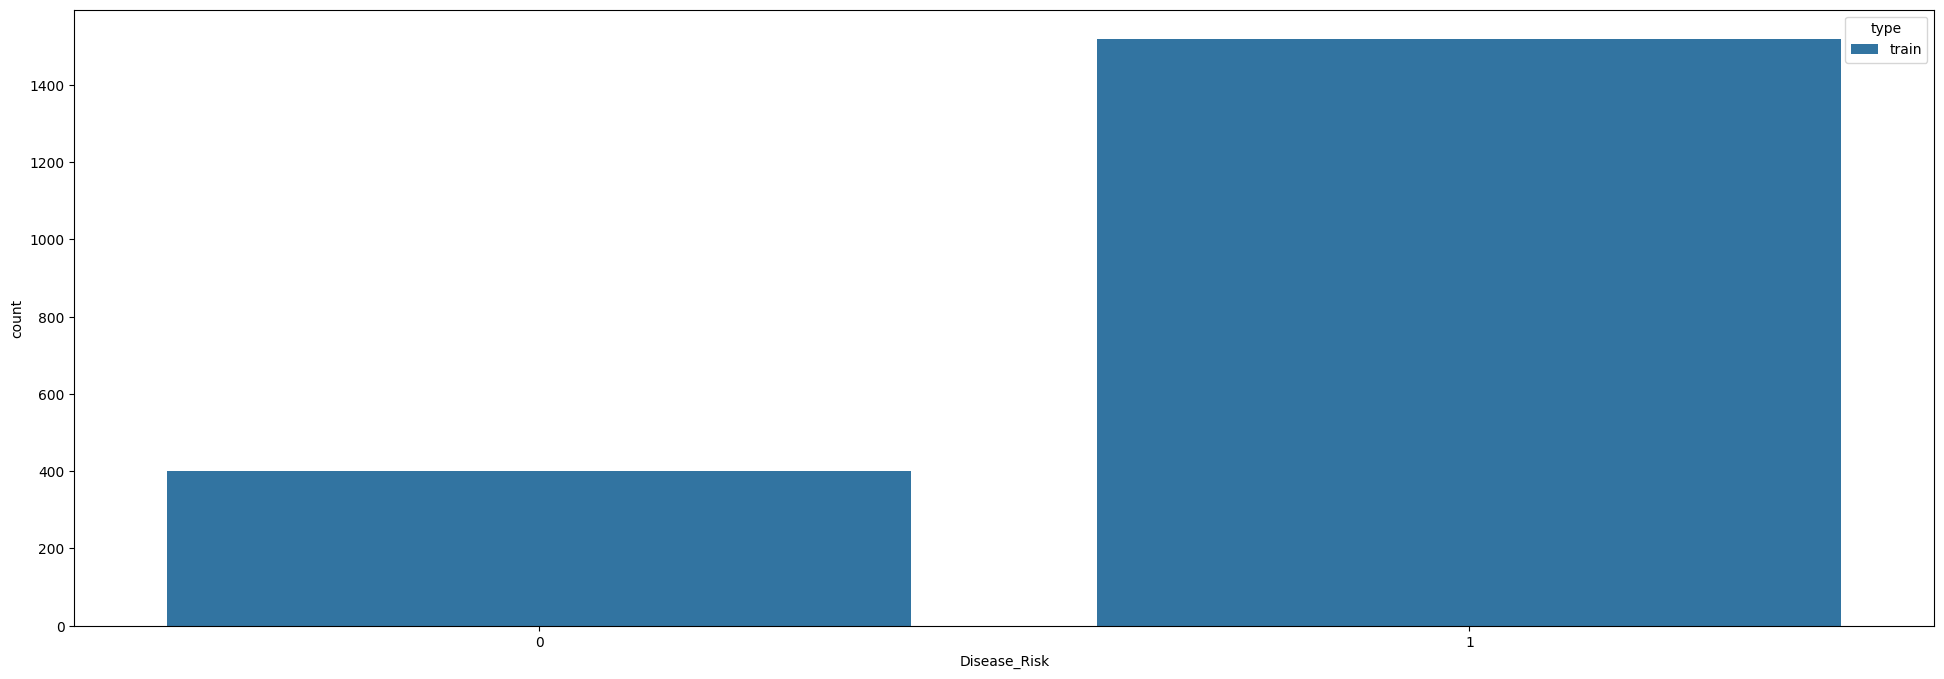

In [12]:
# Quantity of eyes with pathology vs quantity of eyes without pathology with hue for the dataset(train, test and validation)

plt.figure(figsize=(24, 8))
sns.countplot(x='Disease_Risk', hue='type', data=df_train)


<Axes: >

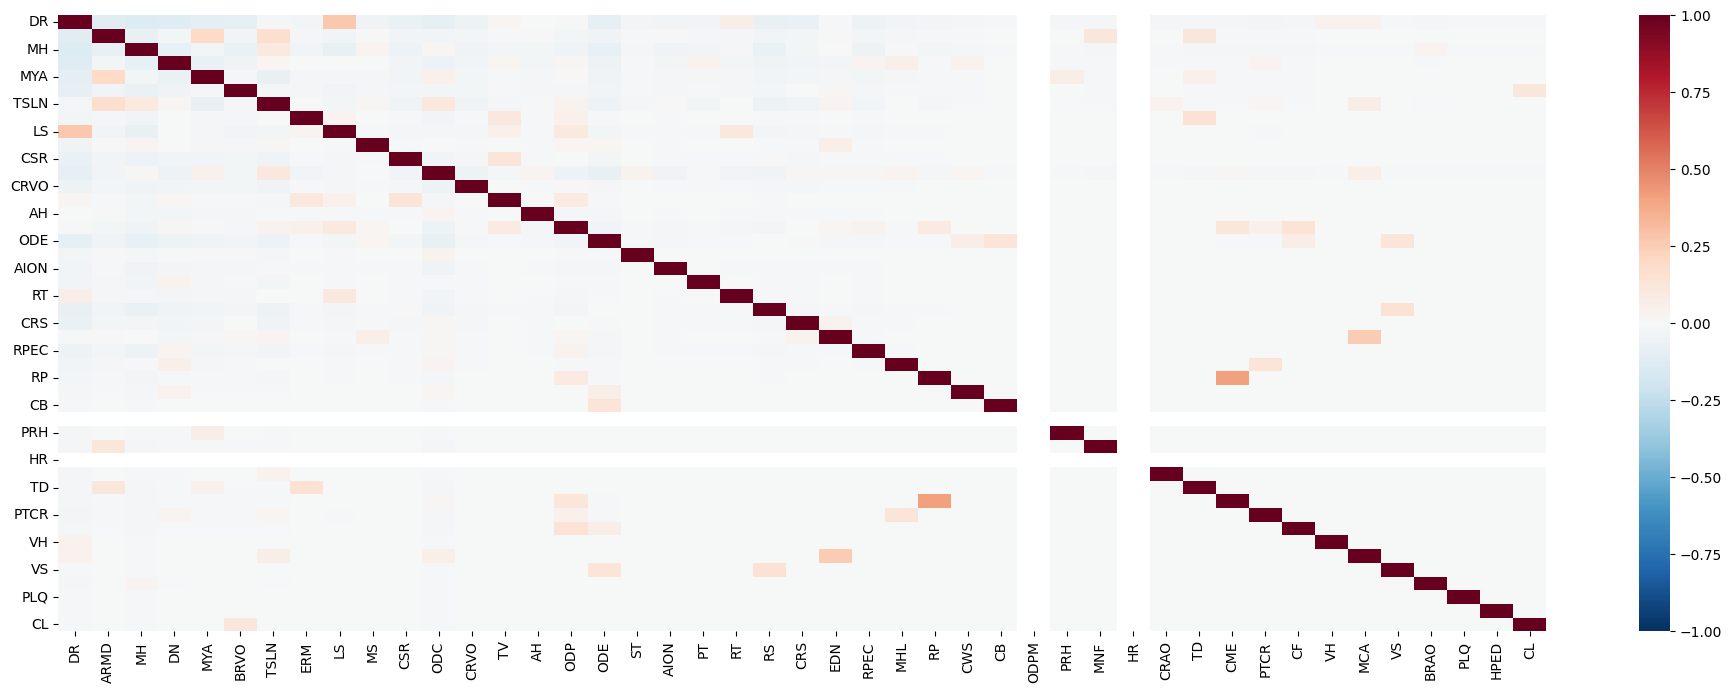

In [13]:
# Correlation between the pathologies

plt.figure(figsize=(24, 8))
sns.heatmap(df_train.drop(['file_name', 'Disease_Risk', 'type'], axis=1).corr(), cmap='RdBu_r', vmax=1.0, vmin=-1.0,)


In [15]:
# Calculate the mean and std of the images

def get_shape(file_name):
    image = mpimg.imread(os.path.join('../datasets/training/', file_name))
    return image.shape

df_train['shape'] = df_train['file_name'].apply(get_shape)

<Axes: xlabel='shape', ylabel='count'>

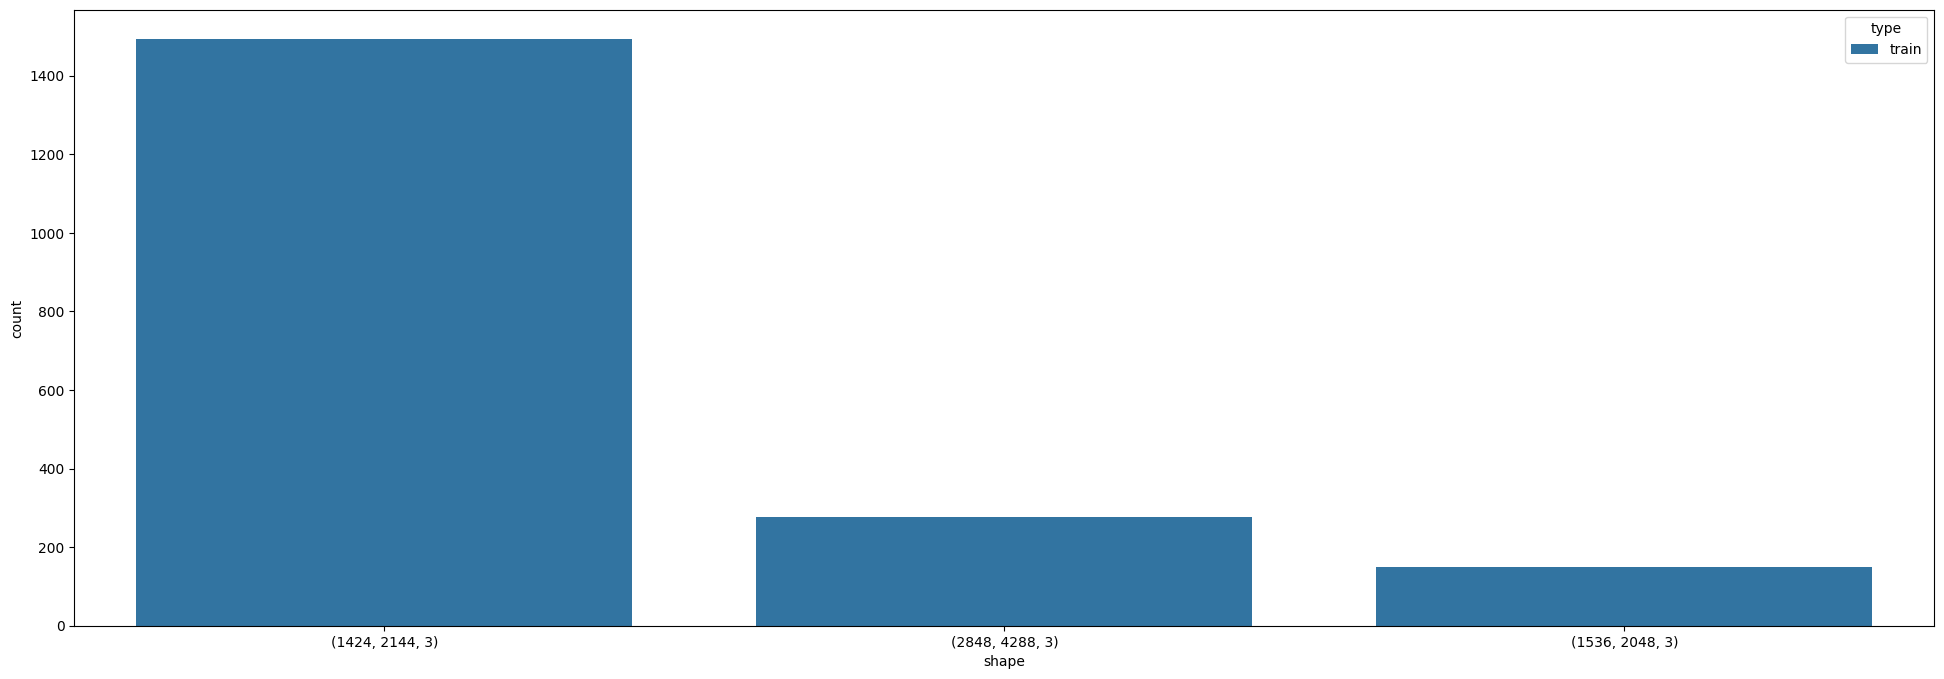

In [17]:
# Plot the distribution of the shapes

plt.figure(figsize=(24, 8))
sns.countplot(x='shape', hue='type', data=df_train)

In [103]:
total_sum = [0, 0, 0]
total_sum_sq = [0, 0, 0]
total_count = 0

for shape in df_train['shape'].unique():
    sum = [0, 0, 0]
    sum_sq = [0, 0, 0]
    count = 0
    for img in df_train[df_train['shape'] == shape]['file_name'].values:
        image = Image.open(os.path.join('../datasets/training/', img))
        image = np.array(image) / 255.0
        image = image[image[:, :, 0] > 0.06]

        # Sum the pixels by channel
        sum += np.sum(image, axis=0)
        sum_sq += np.sum(image ** 2, axis=0)
        count += image.shape[0]

    total_count += count
    total_sum += sum
    total_sum_sq += sum_sq

    mean = sum / count
    std = np.sqrt(sum_sq / count - mean ** 2)

    print("Shape: ", shape)
    print("Mean: ", mean)
    print("Std: ", std)

total_mean = total_sum / total_count
total_std = np.sqrt(total_sum_sq / total_count - total_mean ** 2)

print("Total mean: ", total_mean)
print("Total std: ", total_std)

Shape:  (1424, 2144, 3)
Mean:  [0.6072398  0.40012667 0.22312242]
Std:  [0.15314142 0.12791779 0.12009073]
Shape:  (2848, 4288, 3)
Mean:  [0.59169255 0.28666516 0.09397617]
Std:  [0.17994411 0.12810065 0.08768493]
Shape:  (1536, 2048, 3)
Mean:  [0.49654163 0.25455866 0.11922807]
Std:  [0.13767262 0.09073118 0.10520288]
Total mean:  [0.59394743 0.33779393 0.15540815]
Total std:  [0.16763987 0.13925351 0.12256385]


(-0.5, 4287.5, 2847.5, -0.5)

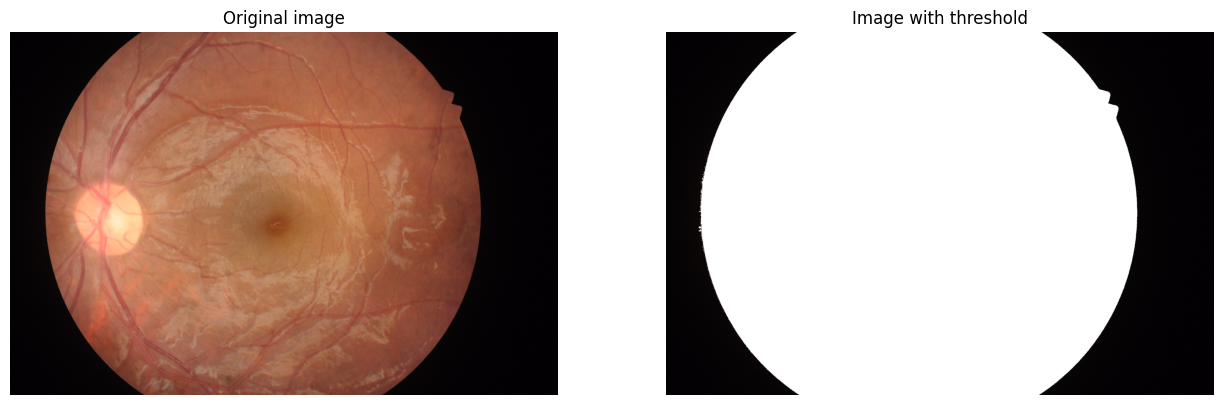

In [100]:
image = Image.open(os.path.join('../datasets/training/', df_train['file_name'].values[1600])) 

image = np.array(image) / 255.0

# Plot
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

image[image[:, :, 0] > 0.06] = 1.0

plt.subplot(1, 3, 2)
plt.imshow(image)
plt.title("Image with threshold")
plt.axis('off')

